# EXPLORE PROGRAMMING

In [68]:
from src.make_lti_crn import makeLtiCrn
from src.model import Model
from src.symbolic_jacobian_maker import SymbolicJacobianMaker

import numpy as np
import pandas as pd
import random
import sympy as sp
import tellurium as te

# Symbolic Solution of Linear Systems

In [132]:
model_str = makeLtiCrn(num_species=5,
                is_input_boundary=True, 
                num_reaction=15,
                num_products_bounds=(1, 2),
                kinetic_constant_bounds= (0.1, 1),
                stoichiometry_bounds=(1, 3),
                boundary_species_indices=[1])
print(model_str)

# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # Species
  species S1_;
  species S2_;
  species S3_;
  species S4_;
  species S5_;

  -> $S1_; k1
  S4_ -> S4_ + 2 S5_; k2 * S4_
  S4_ -> 3 S5_; k3 * S4_
  S4_ -> S4_ + 3 S5_; k4 * S4_
  S1_ -> 2 S4_ + 2 S3_; k5 * S1_
  S1_ -> 2 S5_ + S4_; k6 * S1_
  S2_ -> 3 S5_ + S5_; k7 * S2_
  S5_ -> 3 S4_; k8 * S5_
  S4_ -> S3_ + 3 S3_; k9 * S4_
  S2_ -> 3 S5_; k10 * S2_
  S1_ -> S4_ + 3 S5_; k11 * S1_
  S3_ -> S4_ + S3_; k12 * S3_
  S4_ -> 2 S3_; k13 * S4_
  S2_ -> 3 S5_ + S4_; k14 * S2_
  S1_ -> S4_ + 3 S5_; k15 * S1_

  # Rate constants
  k1 = 1.0000
  k2 = 0.3911
  k3 = 0.6221
  k4 = 0.8233
  k5 = 0.4781
  k6 = 0.7820
  k7 = 0.2538
  k8 = 0.3253
  k9 = 0.7293
  k10 = 0.9644
  k11 = 0.7305
  k12 = 0.9663
  k13 = 0.5862
  k14 = 0.3274
  k15 = 0.3291

  # Species initialization
  $S1_ = 1  # Input boundary species
  S2_ = 0
  S3_ = 0
  S4_ = 0
  S5_ = 0


  # Degradation reactions
  S3_ -> ; kd_1 * 

In [133]:
model = Model(model_str)
maker = SymbolicJacobianMaker(model)
maker.initialize()

if False:
    parameters = list(model.parameter_dct.keys())
    parammeters = random.shuffle(parameters)
    parameters = ["k1", "k2", "k3", "k4", "k5", "k6", "k7", "k8", "k9",
                 "k10", "k12", "k13", "k14", "k15", "k16", "k17", "k18"]
    parameter_dct = {k: model.parameter_dct[k] for k in parameters}
else:
    parameter_dct = {}

species_name = "S1_"
species_idx = model.getSpeciesIndex(species_name)
b_smat = maker.b_smat
# Construct the A' matrix and c vector
Ap_smat = maker.jacobian_smat.copy()
Ap_smat[species_idx, :] = sp.Matrix.zeros(1, model.num_species)
Ap_smat = Ap_smat[:, [i for i in range(model.num_species) if i != species_idx]]
b_smat[species_idx] = 0
Ap_smat = Ap_smat.subs(parameter_dct)
b_smat = b_smat.subs(parameter_dct)
c_smat = maker.jacobian_smat[:, species_idx]
c_smat = c_smat.subs(parameter_dct)
c_smat = sp.Matrix.zeros(model.num_species, 1) - c_smat
# Solve for steady-state
x_solns = [sp.Symbol(f"x{n}_ss") for n in range(2, model.num_species+1)]
#x2_ss,x3_ss, x4_ss = sp.symbols("x2_ss,x3_ss, x4_ss")
#x_ss = sp.Matrix([x2_ss, x3_ss, x4_ss])
x_ss = sp.Matrix(x_solns)
solution = sp.solve(Ap_smat * x_ss + b_smat - c_smat, x_solns)
#
list(solution.values())[-1].subs(model.parameter_dct)

2.07947468283979

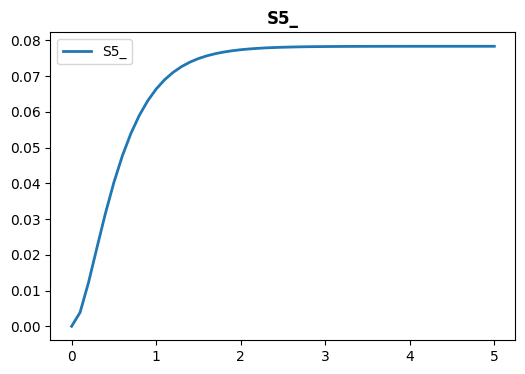

In [131]:
model.roadrunner.reset()
species_name = f"S{list(solution.keys())[-1].name[1]}_"
model.roadrunner.simulate(selections=["time", species_name])
model.roadrunner.plot(title=species_name)

In [24]:
type(list(solution.keys())[0])

sympy.core.symbol.Symbol

In [22]:
maker.jacobian_smat

Matrix([
[1.0*k5,                0,         0,                 0],
[     0, -1.0*k3 - 1.0*k4,         0,                 0],
[     0,                0, -1.0*kd_1,                 0],
[3.0*k5,  5.0*k3 + 5.0*k4,         0, 2.0*k2 - 1.0*kd_2]])

In [8]:
b_smat

Matrix([
[0],
[0],
[0],
[0]])

In [9]:
c_smat

Matrix([
[1.0*k2 + 1.0*k4],
[              0],
[        -3.0*k4],
[        -3.0*k2]])

In [10]:
solution

{x2_ss: 0.0, x3_ss: 3.0*k4/kd_2, x4_ss: (3.0*k2*kd_2 + 9.0*k3*k4)/(kd_2*kd_3)}

In [16]:
model.roadrunner.steadyState()

2.71894654694141e-25

In [ ]:
model.roadrunner['S4_']